In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [3]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = ""

In [4]:
path = "../data/"
reward_prefix = "wholesale_reward.csv"

In [5]:
#ANALYSIS_DIR = DATA_DIR / ANALYSIS_DIR_NAME

### Reward analysis

In [6]:
df_reward = pd.read_csv(os.path.join(path+reward_prefix))


In [7]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [8]:
def min_max_scaler(series):
    return (series - series.min()) / (series.max() - series.min())

In [9]:

df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

temp_merge_df = pd.DataFrame()
temp_name = []
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        temp_df2 = temp_df[column].apply(pd.Series)
        i=0
        for column2 in temp_df2:
            temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
            i+=1
            
        
    else:
        temp_merge_df[column] = temp_df[column]
    
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")




/tmp/ipykernel_9820/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_9820/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_9820/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

In [10]:
df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names
action_observation_reward_df = pd.concat([df_action,temp_merge_df, df_reward[["reward", "balancing_reward", "wholesale_reward","shaped_return"]]],axis=1)
write_unique_game_id(action_observation_reward_df)
df = action_observation_reward_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Columns: 351 entries, energy_1 to shaped_return
dtypes: float64(348), int64(2), object(1)
memory usage: 6.3+ MB


In [11]:
df[df["customer_count"].shift(1) -df["customer_count"] > 8000 | (df["customer_count"].shift(1) -df["customer_count"] < 8000)]["customer_count"]

11      54318
17      52076
23      51658
29      51370
89      57340
        ...  
2216    51408
2264    54990
2270    53539
2276    52633
2282    52093
Name: customer_count, Length: 168, dtype: int64

In [12]:
df.iloc[77:105][["customer_count","reward","balancing_reward", "wholesale_reward","shaped_return","hour_of_day_0"]]

,customer_count,reward,balancing_reward,wholesale_reward,shaped_return,hour_of_day_0
77,57307,-0.080642,-0.081458,0.000816,-1.027540,0.0
78,57307,-0.189134,-0.192032,0.002898,-1.521039,0.0
79,57307,-0.029887,-0.030093,0.000205,-0.672303,0.0
80,57307,-0.002877,-0.003468,0.000591,-0.380596,0.0
81,57307,-0.133887,-0.118948,-0.014939,-1.216028,0.0
82,57307,-0.012293,-0.000846,-0.011447,-0.049995,0.0
83,57370,-0.068448,-0.069100,0.000652,-0.958996,0.0
84,57370,-0.066601,-0.046970,-0.019630,-0.830889,0.0
85,57370,-0.016782,-0.017047,0.000265,-0.569321,0.0
86,57370,-0.040068,-0.022152,-0.017916,-0.610061,0.0


In [13]:
df[df["reward"]< -0.3 ]

,energy_1,price_1,energy_2,price_2,energy_3,price_3,energy_4,price_4,energy_5,price_5,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,reward,balancing_reward,wholesale_reward,shaped_return
11,-40.270603,14.274159,37.041771,-39.143214,-16.286141,69.556773,-29.855049,23.466614,12.326175,-0.926253,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.330795,-0.327327,-0.003468,-1.938203
23,13.657564,-49.815398,-2.265269,88.302892,48.231959,-66.707963,35.840839,-97.618461,46.595889,-69.882339,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.317158,-0.308602,-0.008556,-1.840310
168,-39.172459,94.732910,-34.310862,25.088036,-46.958268,74.054730,20.875114,-77.603561,-47.569039,5.952150,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.325774,-0.313854,-0.011920,-1.854885
190,49.351650,-75.502276,9.516746,-69.887185,43.996382,-54.146385,-8.955023,70.106328,-24.095348,16.375342,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.305388,-0.305034,-0.000354,-1.830379
238,2.643234,-50.889885,12.553596,-7.473347,-16.375303,39.418283,40.703261,-99.610174,45.347393,-21.380803,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.313935,-0.307900,-0.006035,-1.841633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,14.677072,-10.998577,-48.516285,79.809260,-9.535056,47.890908,46.738541,-41.488019,47.943431,-98.765123,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.311019,-0.301737,-0.009282,-1.830903
2276,-34.186631,93.618989,13.441169,-99.456060,28.839886,-92.828995,26.508969,-91.110414,22.226614,-92.389607,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.313493,-0.313561,0.000068,-1.885230
2277,8.681470,-2.430275,19.462442,-65.987074,35.715401,-40.719643,48.399597,-39.565912,-20.105147,62.720513,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.322672,-0.304462,-0.018210,-1.851806
2357,-27.405137,9.814397,-17.936969,93.760324,13.018572,-19.664583,-47.900173,78.401142,-5.414194,31.425017,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.310476,-0.294392,-0.016084,-1.839576


In [14]:
df_reward_rolling = df_reward["reward"].rolling(20).mean().dropna()
df_balancing_reward = df_reward["balancing_reward"].rolling(5).mean().dropna()
df_wholesale_reward = df_reward["wholesale_reward"].rolling(5).mean().dropna()
df_tariff_reward = df_reward["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

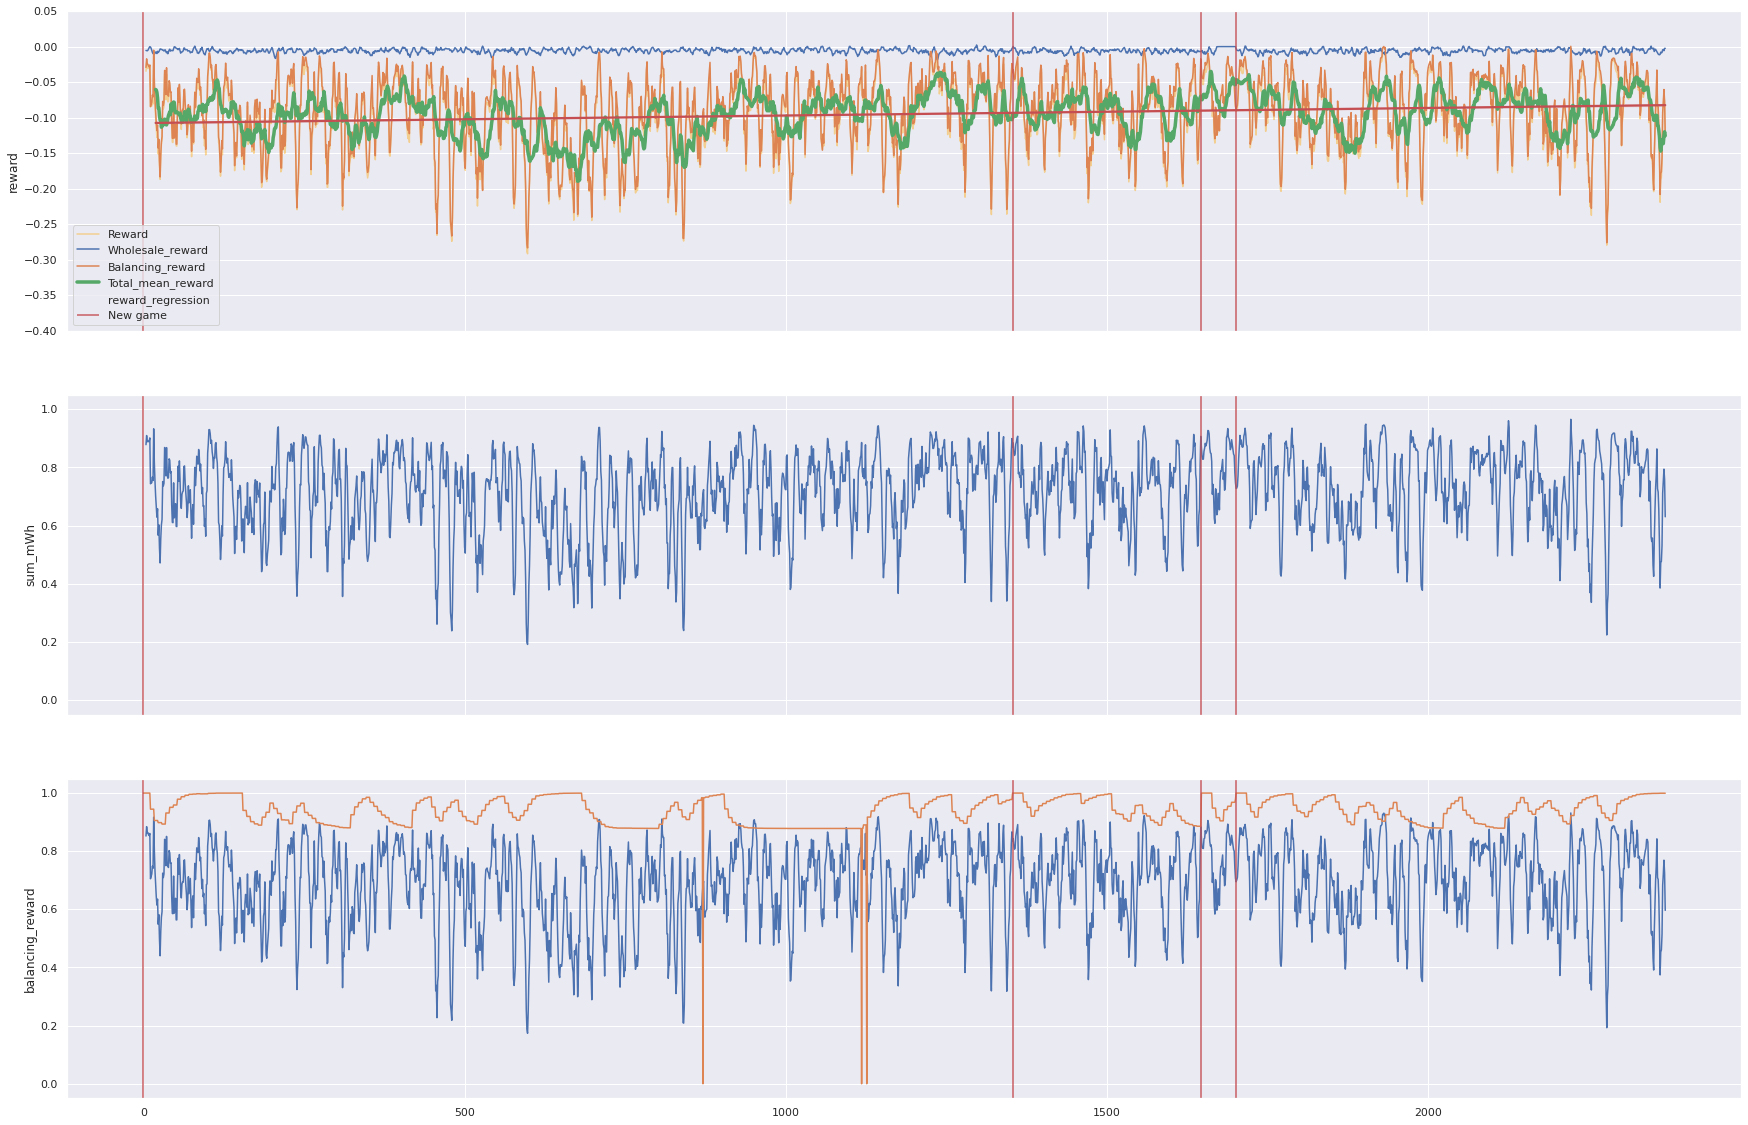

In [15]:

sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(3, 1, sharex=True)



#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")

graph7 = sns.lineplot(x=df_reward.index, y=df_reward["reward"].rolling(5).mean(), color="orange", ax=axs[0], alpha=0.4, label="Reward")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs[0],label="Wholesale_reward")
graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs[0], label="Balancing_reward")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs[0], label="Total_mean_reward", linewidth= 3.5)
graph8 = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, marker="", label="reward_regression", ax=axs[0])
#graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["sum_mWh"]).rolling(5).mean(), data=df, ax=axs[1])
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[1])
sns.lineplot(x=df.index, y=min_max_scaler(df["balancing_reward"]).rolling(5).mean(), data=df, ax=axs[2])
sns.lineplot(x=df.index, y=min_max_scaler(df["customer_count"]), data=df, ax=axs[2])


for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            0,
            1,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )
axs[0].legend()
axs[1].set_ylabel("sum_mWh")
axs[0].set_ybound(-0.4,0.05)
f.set_figwidth(30)
f.set_figheight(20)


In [49]:
df.iloc[df.index < 2365]["cleared_orders_energy_23"].max()

49.640838623046875

In [51]:
timeslot = 2360
col_names_temp = ["reward", "customer_count"]
templist = []
for i in range(24):
    energy_price_bid = df.iloc[timeslot - i -1][[f"energy_{i+1}",f"price_{i+1}"]].values
    trade_result = df.iloc[timeslot - i][[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"]].values
    market_position = df.iloc[timeslot -i][f"market_position_{i}"]
    #if i = 0:
    #    trade_result[0] = df.iloc[timeslot]["final"]
    templist.append([*energy_price_bid, *trade_result, market_position])

pd.DataFrame(templist, columns=["energy_action", "price_action", "energy_trade_order", "price_trade_order", "market_position"])

,energy_action,price_action,energy_trade_order,price_trade_order,market_position
0,19.391143,-81.234211,0.000000,0.000000,68.129874
1,-39.478016,26.591176,0.000000,0.000000,68.129874
2,13.018572,-19.664583,0.972944,-25.708035,68.129874
3,-22.890487,30.873603,15.274149,-46.879123,67.156930
4,-41.060373,4.563498,0.000000,0.000000,50.923831
5,-44.828942,69.533110,0.000000,0.000000,50.923831
6,-38.579041,28.312233,1.688033,-48.909634,50.923831
7,-40.633050,21.175301,0.000000,0.000000,48.719151
8,9.659517,-11.551473,0.000000,0.000000,48.719151
9,-46.988073,82.976520,0.000000,0.000000,48.719151


In [42]:
pd.DataFrame(templist, columns=)

,energy_action,price_action,energy_trade_order,price_trade_order
0,19.391143,-81.234211,0.000000,0.000000
1,-39.478016,26.591176,0.000000,0.000000
2,13.018572,-19.664583,0.972944,-25.708035
3,-22.890487,30.873603,15.274149,-46.879123
4,-41.060373,4.563498,0.000000,0.000000
5,-44.828942,69.533110,0.000000,0.000000
6,-38.579041,28.312233,1.688033,-48.909634
7,-40.633050,21.175301,0.000000,0.000000
8,9.659517,-11.551473,0.000000,0.000000
9,-46.988073,82.976520,0.000000,0.000000


In [33]:
df.iloc[timeslot - i -1][[f"energy_{i+1}",f"price_{i+1}"]]

energy_1    19.391143
price_1    -81.234211
Name: 2359, dtype: object

In [23]:
for index, value in df[df.columns.difference(pd.Index(["gameId"]))].corr()["reward"].sort_values().iteritems():
    
    print(index, value)

market_position_2 -0.8014480990370471
total_prosumption -0.2415264343762802
p_grid_imbalance_7 -0.211448244712748
p_grid_imbalance_8 -0.2102239285166978
p_grid_imbalance_9 -0.20495341908938747
p_grid_imbalance_10 -0.1924779262644104
hour_of_day_22 -0.19071685203116673
p_grid_imbalance_6 -0.1862436321360309
p_grid_imbalance_5 -0.17678303642771964
p_grid_imbalance_3 -0.16949601400607064
p_grid_imbalance_4 -0.16049199565208275
p_grid_imbalance_2 -0.1542137235820435
timeslot -0.14860771519710303
p_wind_speed_10 -0.13984720923492822
p_wind_speed_12 -0.13839213342336062
p_wind_speed_11 -0.13058934650242301
market_position_0 -0.1299914691994915
day_of_week_5 -0.12285317640848399
p_wind_speed_8 -0.12230812502575948
p_grid_imbalance_11 -0.12169858322634235
p_wind_speed_2 -0.12122360061352956
market_position_4 -0.12063374903260289
p_wind_speed_9 -0.1206205480529512
p_wind_speed_4 -0.1192719910777353
hour_of_day_1 -0.11920978250264347
market_position_3 -0.11853062702689199
p_wind_speed_3 -0.11738

In [18]:
for x in df.columns:
    print(x)

energy_1
price_1
energy_2
price_2
energy_3
price_3
energy_4
price_4
energy_5
price_5
energy_6
price_6
energy_7
price_7
energy_8
price_8
energy_9
price_9
energy_10
price_10
energy_11
price_11
energy_12
price_12
energy_13
price_13
energy_14
price_14
energy_15
price_15
energy_16
price_16
energy_17
price_17
energy_18
price_18
energy_19
price_19
energy_20
price_20
energy_21
price_21
energy_22
price_22
energy_23
price_23
energy_24
price_24
gameId
timeslot
p_grid_imbalance_0
p_grid_imbalance_1
p_grid_imbalance_2
p_grid_imbalance_3
p_grid_imbalance_4
p_grid_imbalance_5
p_grid_imbalance_6
p_grid_imbalance_7
p_grid_imbalance_8
p_grid_imbalance_9
p_grid_imbalance_10
p_grid_imbalance_11
p_grid_imbalance_12
p_grid_imbalance_13
p_grid_imbalance_14
p_grid_imbalance_15
p_grid_imbalance_16
p_grid_imbalance_17
p_grid_imbalance_18
p_grid_imbalance_19
p_grid_imbalance_20
p_grid_imbalance_21
p_grid_imbalance_22
p_grid_imbalance_23
p_customer_prosumption_0
p_customer_prosumption_1
p_customer_prosumption_2
p

In [21]:
df2 = pd.DataFrame()
df2["predicted_consumption_mWh"] = df["p_customer_prosumption_0"] /-1000
df2["timeslot"] = df["timeslot"]
df2["market_position_0"] = df["market_position_0"]
df2["sum_mWh"] = df["sum_mWh"]
df2["error_prediction"] = abs(df2["sum_mWh"]) - df2["predicted_consumption_mWh"]
df2

,predicted_consumption_mWh,timeslot,market_position_0,sum_mWh,error_prediction
0,3.158650,362,0.000000,63.734439,60.575789
1,1.028625,363,0.000000,49.715512,48.686887
2,2.351820,364,0.000000,42.554187,40.202366
3,2.485271,365,76.689322,38.390768,35.905497
4,2.843510,366,24.239940,25.528902,22.685392
...,...,...,...,...,...
368,9.852182,730,145.985644,40.511581,30.659399
369,9.906899,731,139.532297,54.380147,44.473247
370,9.414549,732,5.773578,37.515382,28.100833
371,8.868152,733,123.108493,63.452024,54.583872


### Action analysis

In [ ]:
f,axs = plt.subplots(1,1,figsize=(25,25))
for i in range(1):
    #ax = sns.scatterplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
    ax = sns.histplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
    

In [ ]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[energy], orient="h")

In [ ]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[price],  orient="h")

In [ ]:

for i in range(0,24,1):
    print(df_action[df_action[price[i]] >=0])